In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 8.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests
import os

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import csv
import time
from selenium.webdriver import ActionChains
import warnings
warnings.simplefilter('ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [66.5 

In [ ]:
url = "https://nanos.ai"
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
driver.implicitly_wait(8)
driver.get(url)


In [ ]:
data = driver.find_element_by_xpath('/html/body').text
if (data==''):
  data = driver.find_element_by_xpath('/html').text
data

'Search:\nNanos is a do-it-yourself\npay-as-you-go\nadvertising tool\nCreate optimized ad campaigns on Google, Facebook, and Instagram all in one place with Nanos patented Artificial Intelligence technology\nBecome your own marketing agency in 4 easy steps\nNo website, no Facebook Business page required\nOnline marketing should be this simple\nIt’s like having an agency in your pocket!\nStep 1: Sign up at Nanos and tell us in a few words about your great product or service\nStep 2: Nanos AI will suggest ad text, keywords, interests, and platforms for your ad\nStep 3: Decide on the budget you want to spend, and how long to run your ads\nStep 4: Log in to your dashboard and watch Nanos AI in action optimizing at lightning speed\nAs seen on:\nThe digital marketing superhero for every kind of business\nWhether you have a physical store or an online venture, the goal is the same: to grow your business!\nWe understand that existing marketing tools may be too complicated and expensive. After 

In [ ]:
data

'Search:\nNanos is a do-it-yourself\npay-as-you-go\nadvertising tool\nCreate optimized ad campaigns on Google, Facebook, and Instagram all in one place with Nanos patented Artificial Intelligence technology\nBecome your own marketing agency in 4 easy steps\nNo website, no Facebook Business page required\nOnline marketing should be this simple\nIt’s like having an agency in your pocket!\nStep 1: Sign up at Nanos and tell us in a few words about your great product or service\nStep 2: Nanos AI will suggest ad text, keywords, interests, and platforms for your ad\nStep 3: Decide on the budget you want to spend, and how long to run your ads\nStep 4: Log in to your dashboard and watch Nanos AI in action optimizing at lightning speed\nAs seen on:\nThe digital marketing superhero for every kind of business\nWhether you have a physical store or an online venture, the goal is the same: to grow your business!\nWe understand that existing marketing tools may be too complicated and expensive. After 

In [ ]:
data_cleaned = data.replace("\n", " ")

In [ ]:
data_cleaned

'Search: Nanos is a do-it-yourself pay-as-you-go advertising tool Create optimized ad campaigns on Google, Facebook, and Instagram all in one place with Nanos patented Artificial Intelligence technology Become your own marketing agency in 4 easy steps No website, no Facebook Business page required Online marketing should be this simple It’s like having an agency in your pocket! Step 1: Sign up at Nanos and tell us in a few words about your great product or service Step 2: Nanos AI will suggest ad text, keywords, interests, and platforms for your ad Step 3: Decide on the budget you want to spend, and how long to run your ads Step 4: Log in to your dashboard and watch Nanos AI in action optimizing at lightning speed As seen on: The digital marketing superhero for every kind of business Whether you have a physical store or an online venture, the goal is the same: to grow your business! We understand that existing marketing tools may be too complicated and expensive. After all, not everyon

In [ ]:
data_words=data_cleaned.split(' ')

# Method-1 using Basic NLP processing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
text=data
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
tokens = [w.lower() for w in tokens]
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
words = [word for word in stripped if word.isalpha()]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['search', 'nanos', 'doityourself', 'payasyougo', 'advertising', 'tool', 'create', 'optimized', 'ad', 'campaigns', 'google', 'facebook', 'instagram', 'one', 'place', 'nanos', 'patented', 'artificial', 'intelligence', 'technology', 'become', 'marketing', 'agency', 'easy', 'steps', 'website', 'facebook', 'business', 'page', 'required', 'online', 'marketing', 'simple', 'like', 'agency', 'pocket', 'step', 'sign', 'nanos', 'tell', 'us', 'words', 'great', 'product', 'service', 'step', 'nanos', 'ai', 'suggest', 'ad', 'text', 'keywords', 'interests', 'platforms', 'ad', 'step', 'decide', 'budget', 'want', 'spend', 'long', 'run', 'ads', 'step', 'log', 'dashboard', 'watch', 'nanos', 'ai', 'action', 'optimizing', 'lightning', 'speed', 'seen', 'digital', 'marketing', 'supe

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(words)

['search', 'nanos', 'doityourself', 'payasyougo', 'advertising', 'tool', 'create', 'optimized', 'ad', 'campaigns', 'google', 'facebook', 'instagram', 'one', 'place', 'nanos', 'patented', 'artificial', 'intelligence', 'technology', 'become', 'marketing', 'agency', 'easy', 'steps', 'website', 'facebook', 'business', 'page', 'required', 'online', 'marketing', 'simple', 'like', 'agency', 'pocket', 'step', 'sign', 'nanos', 'tell', 'us', 'words', 'great', 'product', 'service', 'step', 'nanos', 'ai', 'suggest', 'ad', 'text', 'keywords', 'interests', 'platforms', 'ad', 'step', 'decide', 'budget', 'want', 'spend', 'long', 'run', 'ads', 'step', 'log', 'dashboard', 'watch', 'nanos', 'ai', 'action', 'optimizing', 'lightning', 'speed', 'seen', 'digital', 'marketing', 'superhero', 'every', 'kind', 'business', 'whether', 'physical', 'store', 'online', 'venture', 'goal', 'grow', 'business', 'understand', 'existing', 'marketing', 'tools', 'may', 'complicated', 'expensive', 'everyone', 'marketing', 'exp

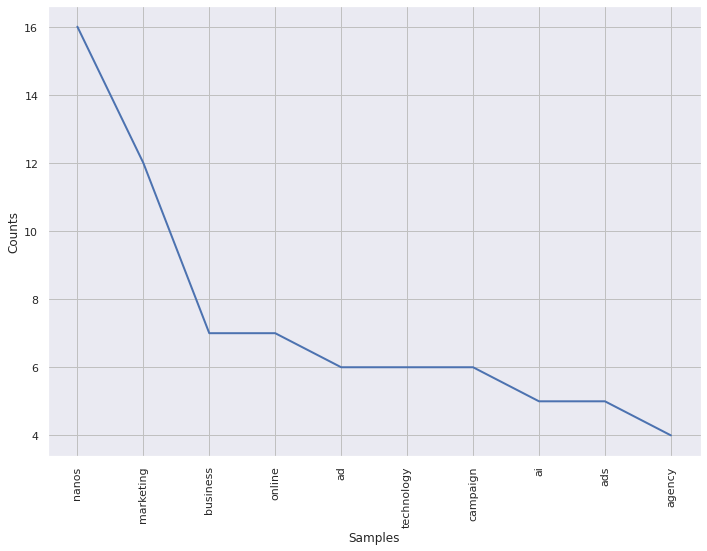

0         nanos
1     marketing
2      business
3        online
4            ad
5    technology
6      campaign
7            ai
8           ads
9        agency
Name: 0, dtype: object

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
nlp=nltk.FreqDist(words)
nlp.plot(10)


k = nlp.most_common(10)
df = pd.DataFrame(k)
m = df.iloc[:, :1]
# m[0].sort_values()
m[0]

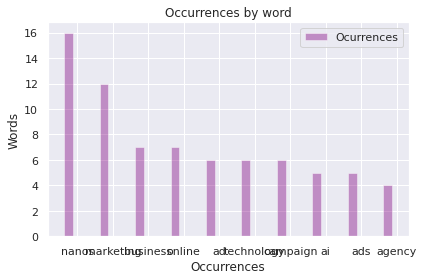

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = k

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

# Method-2 using Stanford Glove and calculating similarity

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-01-18 15:28:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-18 15:28:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-18 15:28:16--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# !unzip glove*.zip

In [ ]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
vector1 = np.mean([word_embeddings['marketing'],word_embeddings['digital']],axis=0)
print(vector1)

[ 0.323735   -0.5141     -0.167035   -0.22616     0.94745505 -0.719965
  0.12138    -0.297025    0.07314     0.2532625   0.30913576 -0.85295
  0.064735   -0.35883     0.3166965   0.032984    0.604715    0.4382
  0.66959     0.0715     -0.538865    0.10506499  0.3873725  -0.05510815
 -0.23929499  0.183395    1.11332     0.257725   -0.4679255  -0.08808
  0.128755    1.24265    -0.53909504 -0.278745    0.268555   -0.22618909
 -0.49732     0.22534901  0.28062484 -0.73089004  0.237957   -0.24466
 -0.851045    0.224325   -0.72107    -0.052635    0.027215   -0.2399
  0.11854999 -0.44983     0.064821    0.1426075  -0.591165    0.28857002
  0.632055   -2.0970001  -0.284075   -0.076415    1.7628     -0.40557
  0.418195    0.15783    -0.24241    -0.26838     0.199069   -0.13085002
  0.2115785   0.0901365   0.61299     0.073946    0.14281     0.083165
  0.2694     -0.165787   -0.21137801 -0.174145   -0.05275     0.271145
 -0.61033005 -0.08386     0.806885   -0.390913    0.10901201  0.34512195
 -1.

In [ ]:
import scipy
dictionary = {}

for i in range(len(words)):
  if words[i] in word_embeddings:
    vector2 = word_embeddings[words[i]]
    cosine = scipy.spatial.distance.cosine(vector1, vector2)
    dictionary[words[i]] = round((1-cosine)*100,2)
  else:
    print("...")

from heapq import nlargest
n_largest = nlargest(15, dictionary, key=dictionary.get)
print(n_largest) 



...
...
...
...
...
...
...
['digital', 'marketing', 'advertising', 'technology', 'business', 'online', 'product', 'video', 'brand', 'network', 'media', 'sales', 'company', 'use', 'venture']
